In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/EastWestAirlines1.csv')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [11]:
df.isnull().sum()

,0
ID#,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0


In [12]:
df.fillna(df.mean(), inplace=True)

In [14]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Convert scaled data back into a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
scaled_df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,-1.864146,-0.283697,0.0,-0.648136,0.0,0.0,-0.765732,-1.002621,0.0,0.0,1.540129,-0.550707
1,-1.863285,-0.561675,0.0,-0.648136,0.0,0.0,-0.761816,-0.867046,0.0,0.0,1.524611,-0.550707
2,-1.862425,0.128974,0.0,-0.648136,0.0,0.0,-0.388530,-0.595896,0.0,0.0,1.556616,-0.550707
3,-1.861564,-0.701241,0.0,-0.648136,0.0,0.0,-0.734593,-1.002621,0.0,0.0,1.516853,-0.550707
4,-1.859843,-0.649888,0.0,-0.648136,0.0,0.0,-0.782352,-1.138196,0.0,0.0,1.512004,-0.550707
...,...,...,...,...,...,...,...,...,...,...,...,...
2221,1.589849,-0.813538,0.0,-0.648136,0.0,0.0,-0.693616,0.488703,0.0,0.0,-1.172028,-0.550707
2222,1.590710,-1.038663,0.0,-0.648136,0.0,0.0,-0.747488,-0.731471,0.0,0.0,-1.176878,-0.550707
2223,1.592430,0.848392,0.0,-0.648136,0.0,0.0,-0.688649,-0.460322,0.0,0.0,-1.177847,1.815846
2224,1.593291,1.136147,0.0,1.335028,0.0,0.0,1.648305,-0.053597,0.0,0.0,-1.174453,1.815846


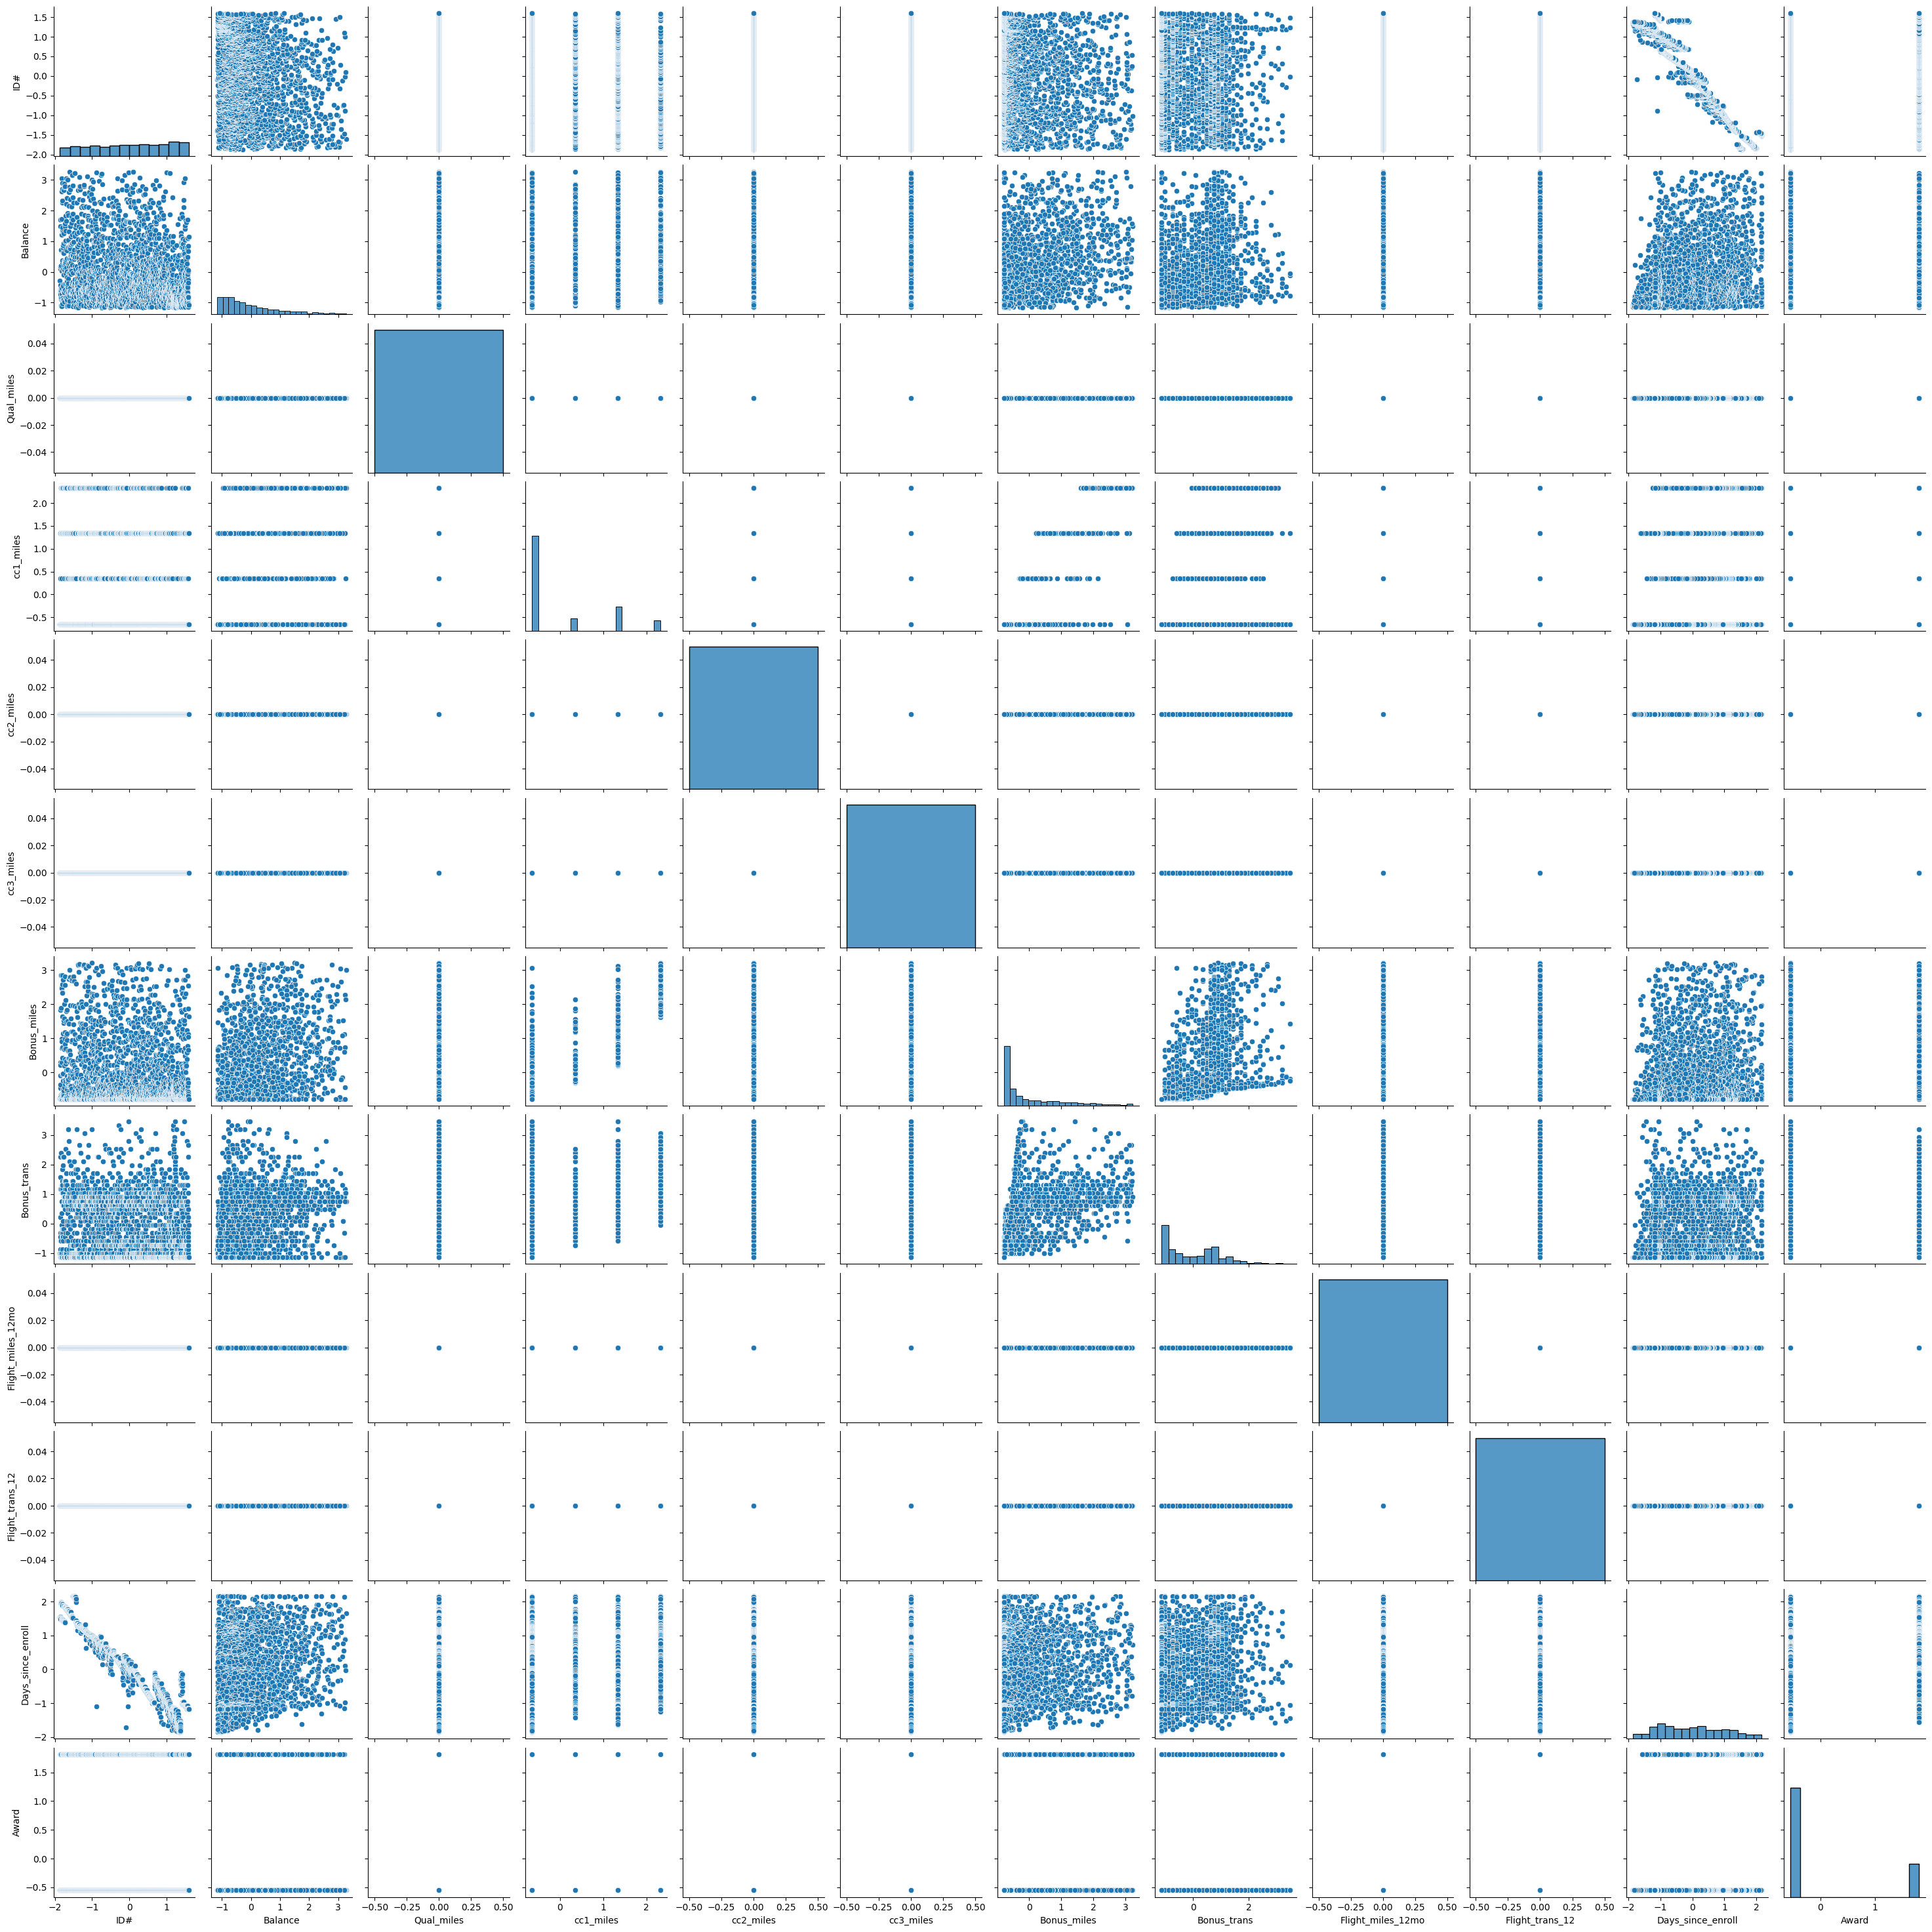

In [16]:
# Plot pair plot to see relationships between features
sns.pairplot(scaled_df)
plt.show()

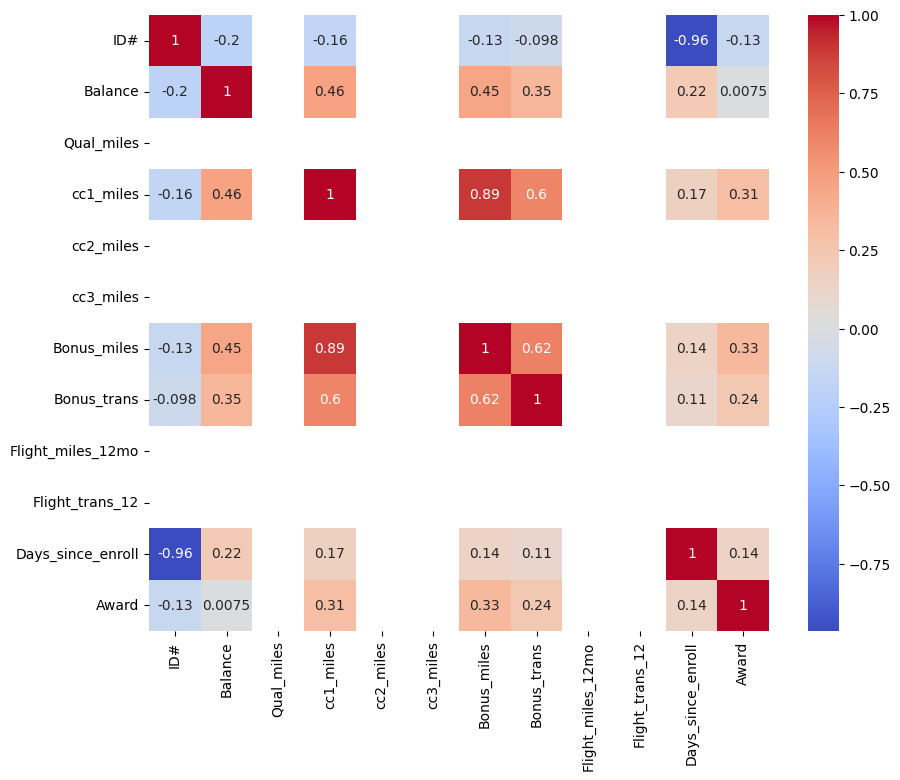

In [17]:
# Heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(scaled_df.corr(), annot=True, cmap="coolwarm")
plt.show()


array([[<Axes: title={'center': 'ID#'}>,
        <Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'Qual_miles'}>],
       [<Axes: title={'center': 'cc1_miles'}>,
        <Axes: title={'center': 'cc2_miles'}>,
        <Axes: title={'center': 'cc3_miles'}>],
       [<Axes: title={'center': 'Bonus_miles'}>,
        <Axes: title={'center': 'Bonus_trans'}>,
        <Axes: title={'center': 'Flight_miles_12mo'}>],
       [<Axes: title={'center': 'Flight_trans_12'}>,
        <Axes: title={'center': 'Days_since_enroll'}>,
        <Axes: title={'center': 'Award'}>]], dtype=object)

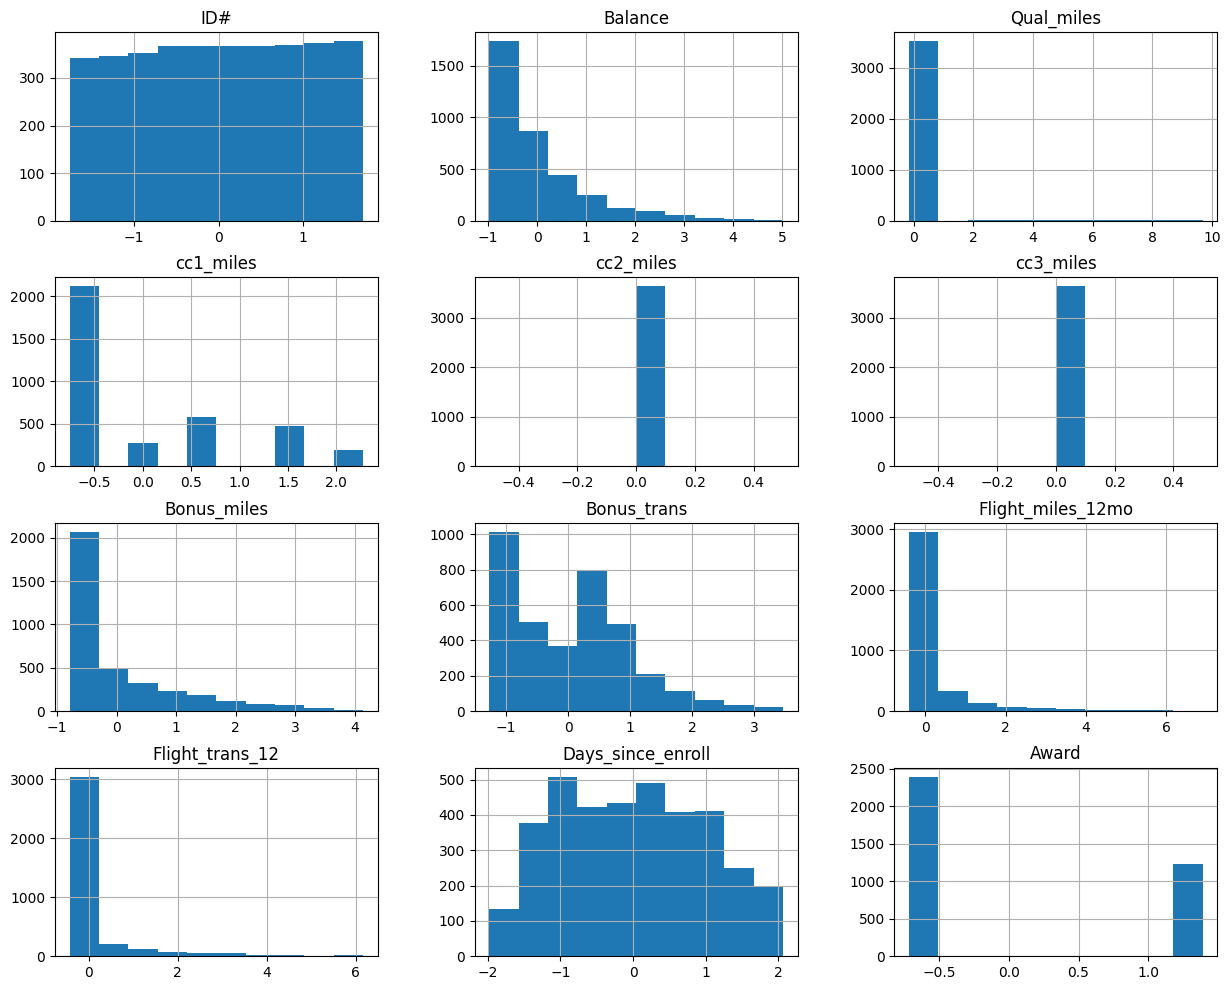

In [19]:
df_scaled.hist(figsize=(15,12))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

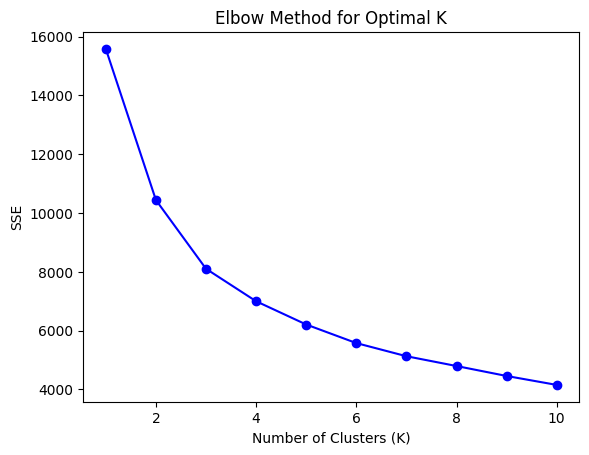

Silhouette Score for K-Means: 0.29178993558827443


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Elbow Method to determine the optimal number of clusters
sse = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.plot(k_values, sse, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal K')
plt.show()

# Using silhouette score for evaluation
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_df)
sil_score_kmeans = silhouette_score(scaled_df, kmeans_labels)

print(f'Silhouette Score for K-Means: {sil_score_kmeans}')


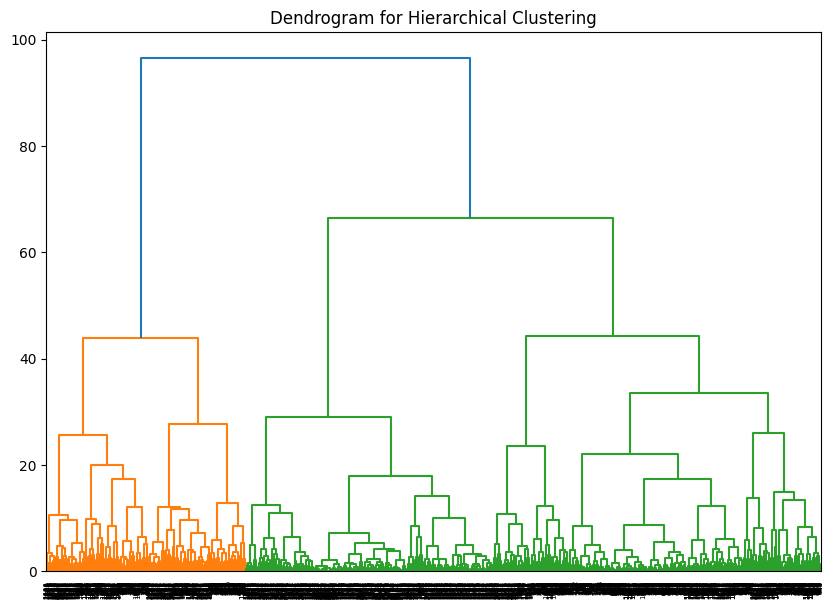

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
linked = linkage(scaled_df, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()


In [22]:
#DBSCAN

from sklearn.cluster import DBSCAN

# Applying DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_df)

# Silhouette score for DBSCAN
if len(set(dbscan_labels)) > 1:  # Ensuring we have more than one cluster
    sil_score_dbscan = silhouette_score(scaled_df, dbscan_labels)
    print(f'Silhouette Score for DBSCAN: {sil_score_dbscan}')
else:
    print("DBSCAN did not create enough clusters for silhouette scoring.")


Silhouette Score for DBSCAN: -0.30425321447976744


In [23]:
# K-Means cluster analysis
scaled_df['KMeans_Cluster'] = kmeans_labels
print(scaled_df.groupby('KMeans_Cluster').mean())

# DBSCAN cluster analysis
scaled_df['DBSCAN_Cluster'] = dbscan_labels
print(scaled_df.groupby('DBSCAN_Cluster').mean())


                     ID#   Balance  Qual_miles  cc1_miles  cc2_miles  \
KMeans_Cluster                                                         
0               0.890721 -0.372175         0.0  -0.568406        0.0   
1              -0.881422 -0.202792         0.0  -0.555478        0.0   
2              -0.246849  0.757240         0.0   1.437987        0.0   

                cc3_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  \
KMeans_Cluster                                                           
0                     0.0    -0.513995    -0.391843                0.0   
1                     0.0    -0.514327    -0.367102                0.0   
2                     0.0     1.314106     0.973178                0.0   

                Flight_trans_12  Days_since_enroll     Award  
KMeans_Cluster                                                
0                           0.0          -0.887957 -0.296095  
1                           0.0           0.866474 -0.105122  
2               

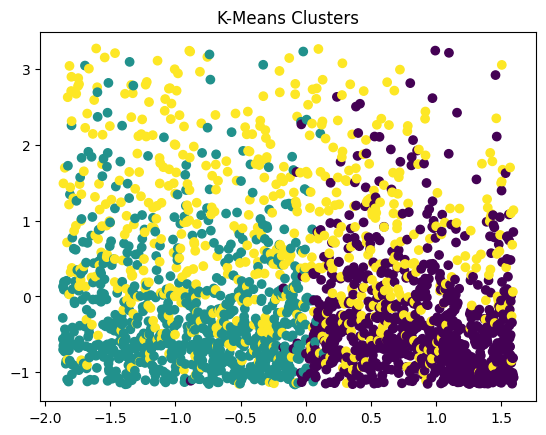

In [24]:
# Visualizing K-Means clusters
plt.scatter(scaled_df.iloc[:, 0], scaled_df.iloc[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clusters')
plt.show()

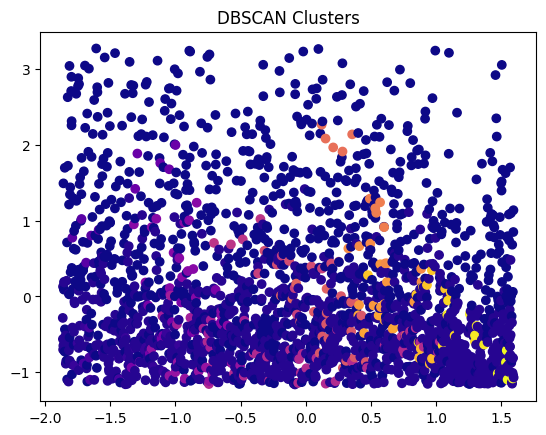

In [25]:
# Visualizing DBSCAN clusters
plt.scatter(scaled_df.iloc[:, 0], scaled_df.iloc[:, 1], c=dbscan_labels, cmap='plasma')
plt.title('DBSCAN Clusters')
plt.show()


In [26]:
print(f'Silhouette Score for K-Means: {sil_score_kmeans}')
if len(set(dbscan_labels)) > 1:
    print(f'Silhouette Score for DBSCAN: {sil_score_dbscan}')


Silhouette Score for K-Means: 0.29178993558827443
Silhouette Score for DBSCAN: -0.30425321447976744
